In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\ebloom\Desktop\Global_Annual_Treecover_Loss.csv', usecols={"iso", "umd_tree_cover_loss__year", "umd_tree_cover_loss__ha"},
                  na_values=["0", ".."])
df.rename(columns = {"umd_tree_cover_loss__year" : "Year", "umd_tree_cover_loss__ha" : "Tree Cover Loss (ha)"}, inplace=True)
df = df.round({'Tree Cover Loss (ha)' : 2})
df = pd.pivot_table(df, values='Tree Cover Loss (ha)', index=['iso'], columns=['Year'])
df.rename(columns={2018 : '2018', 2019 : '2019'},inplace=True)
df = df[['2018', '2019']]
df

Year,2018,2019
iso,,
ABW,0.30,NaN
AFG,25.71,17.12
AGO,242552.50,175098.37
AIA,0.22,NaN
ALA,619.71,2361.29
...,...,...
XKO,593.89,697.40
XNC,17.55,12.56
ZAF,63666.75,76139.76


In [35]:
##different ways to interpolate missing data
##watch DS module lecture for pointers
##calculating the percentage difference of 2018 and 2019 average

av2018 = np.average(df['2018'])


In [36]:
av2019 = np.average(df['2019'])

In [37]:
difference = av2018 - av2019
difference

2998.0177604166674

In [39]:
average = (av2018 + av2019) / 2
average

127405.72033854165

In [41]:
perdif = (difference / average) * 100
perdif

2.353126494203207

In [3]:
import numpy as np
##df.fillna(axis='columns', method='ffill', limit=1)
def interp(x):
    if np.isnan(x['2019']):
        return x['2018']
    return x['2019']

df['2019'] = df.apply(interp, axis = 1)
df.dropna(inplace=True)
##where still NA- no data entry for 2018 either
df
##interpolating missing data from previous year

Year,2018,2019
iso,,
ABW,0.30,0.30
AFG,25.71,17.12
AGO,242552.50,175098.37
AIA,0.22,0.22
ALA,619.71,2361.29
...,...,...
XKO,593.89,697.40
XNC,17.55,12.56
ZAF,63666.75,76139.76


In [4]:
##df['Log 2019'] = np.log10(df['2019'])
##df
##negative result for numbers under 1

In [5]:
import pycountry

##for country in pycountry.countries
  
countries = {}
for country in pycountry.countries:
    countries[country.alpha_3] = country.name
##print(countries)
df['Country'] = [countries.get(code) for code in df.index]
df

Year,2018,2019,Country
iso,,,
ABW,0.30,0.30,Aruba
AFG,25.71,17.12,Afghanistan
AGO,242552.50,175098.37,Angola
AIA,0.22,0.22,Anguilla
ALA,619.71,2361.29,Åland Islands
...,...,...,...
XKO,593.89,697.40,None
XNC,17.55,12.56,None
ZAF,63666.75,76139.76,South Africa


<AxesSubplot:xlabel='2019', ylabel='iso'>

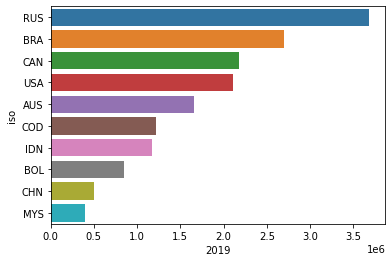

In [6]:
import matplotlib.pyplot as plt

df = df.sort_values(by='2019', ascending=False)
top = df[:10]
sns.barplot(x=top['2019'], y=top.index)

<AxesSubplot:xlabel='2019', ylabel='iso'>

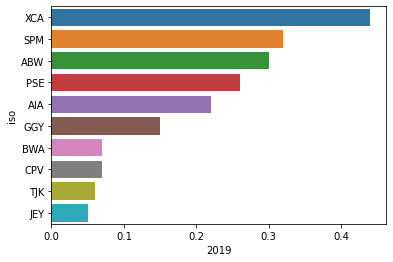

In [7]:
bottom = df[-10:]
sns.barplot(x=bottom['2019'], y=bottom.index)

In [8]:
df.loc[df.index == "ABW"]

Year,2018,2019,Country
iso,,,
ABW,0.3,0.3,Aruba


In [9]:
df.loc[df.index == "AIA"]

Year,2018,2019,Country
iso,,,
AIA,0.22,0.22,Anguilla


In [10]:
print(df.describe())

Year           2018          2019
count  1.920000e+02  1.920000e+02
mean   1.289047e+05  1.259067e+05
std    5.161690e+05  4.291303e+05
min    5.000000e-02  5.000000e-02
25%    1.075825e+02  6.783250e+01
50%    6.160545e+03  4.727185e+03
75%    7.069040e+04  7.189682e+04
max    5.560386e+06  3.686494e+06


<AxesSubplot:>

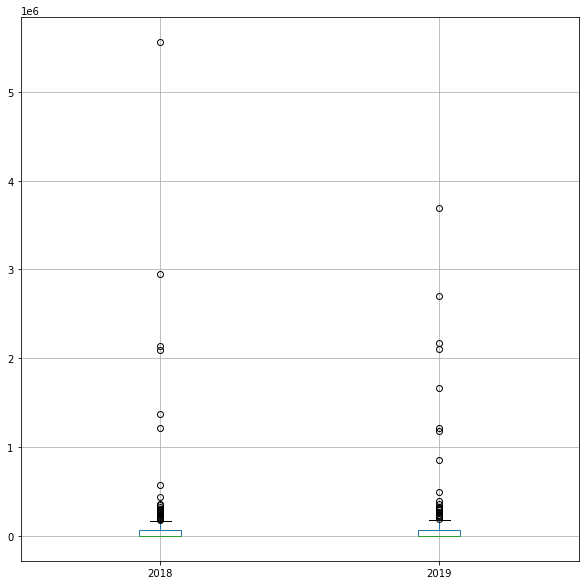

In [11]:
df.boxplot(figsize=(10,10))

array([[<AxesSubplot:title={'center':'2018'}>,
        <AxesSubplot:title={'center':'2019'}>]], dtype=object)

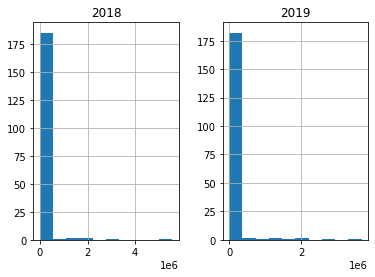

In [12]:
df.hist()

In [13]:
df
##big range in data set - log? already doing it

Year,2018,2019,Country
iso,,,
RUS,5560386.04,3686493.66,Russian Federation
BRA,2948462.08,2696748.80,Brazil
CAN,2142937.38,2175715.83,Canada
USA,2092359.47,2109918.28,United States
AUS,250750.70,1661547.60,Australia
...,...,...,...
GGY,0.10,0.15,Guernsey
BWA,2.62,0.07,Botswana
CPV,10.86,0.07,Cabo Verde


In [14]:
from pandas.plotting import scatter_matrix

##try this with GRO data

# GRO data import

In [15]:
GRO = pd.read_excel('https://recovery.smithschool.ox.ac.uk/wp-content/uploads/2021/05/20210524-Global-Recovery-Observatory-publicv2.xlsx', sheet_name="COVID-19 Measures",
                  na_values=[".."], usecols={'Country', 'Total Value, USD (billions)', 'Clean archetype?', 'Recovery?'})
index = GRO[GRO['Recovery?'] != 1].index
rec = GRO.drop(index, inplace=False)
rec = rec.groupby(["Country"], as_index=False).sum()
rec = rec.drop(columns=['Recovery?', 'Clean archetype?'])

index2 = GRO[GRO['Clean archetype?'] != 1].index
greenrec = GRO.drop(index2, inplace=False)
index = greenrec[greenrec['Recovery?'] != 1].index
greenrec.drop(index, inplace=True)
greenrec = greenrec.groupby(["Country"], as_index=False).sum()
greenrec = greenrec.drop(columns=['Recovery?', 'Clean archetype?'])

In [16]:
merge = greenrec.merge(rec, how='left', left_on='Country', right_on='Country')
merge['Percent'] = (merge['Total Value, USD (billions)_x'] / merge['Total Value, USD (billions)_y']) * 100
merge.rename(columns = {"Total Value, USD (billions)_x" : "Green recovery spending", "Total Value, USD (billions)_y" : "Recovery spending"}, inplace=True)
merge = merge.round({"Percent" : 2})
merge

,Country,Green recovery spending,Recovery spending,Percent
0,Argentina,0.00,6.82,0.00
1,Australia,2.30,130.95,1.76
2,Austria,0.38,1.60,23.75
3,Bangladesh,0.55,0.63,87.30
4,Brazil,0.28,0.54,51.85
5,Burkina Faso,0.00,0.00,NaN
6,Canada,21.67,38.70,55.99
7,Chile,0.45,3.13,14.38
8,China,51.88,427.52,12.14
9,Colombia,0.15,0.32,46.88


In [17]:
##df.loc['VNM']
df.at['VNM', 'Country'] = "Vietnam"

In [20]:
df.at['KOR', 'Country'] = "South Korea"

In [21]:
GROmerge = merge.merge(df, how='left', left_on='Country', right_on='Country')
GROmerge

,Country,Green recovery spending,Recovery spending,Percent,2018,2019
0,Argentina,0.00,6.82,0.00,172958.09,145444.27
1,Australia,2.30,130.95,1.76,250750.70,1661547.60
2,Austria,0.38,1.60,23.75,26310.09,33642.43
3,Bangladesh,0.55,0.63,87.30,19342.87,22078.76
4,Brazil,0.28,0.54,51.85,2948462.08,2696748.80
5,Burkina Faso,0.00,0.00,NaN,NaN,NaN
6,Canada,21.67,38.70,55.99,2142937.38,2175715.83
7,Chile,0.45,3.13,14.38,76897.64,78735.47
8,China,51.88,427.52,12.14,569452.97,496972.44
9,Colombia,0.15,0.32,46.88,352434.01,268409.88


array([[<AxesSubplot:xlabel='Green recovery spending', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='Percent', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='2018', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='2019', ylabel='Green recovery spending'>],
       [<AxesSubplot:xlabel='Green recovery spending', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='Percent', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='2018', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='2019', ylabel='Recovery spending'>],
       [<AxesSubplot:xlabel='Green recovery spending', ylabel='Percent'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Percent'>,
        <AxesSubplot:xlabel='Percent', ylabel='Percent'>,
        <AxesSubplot:xlabel='2018', ylabel='Perc

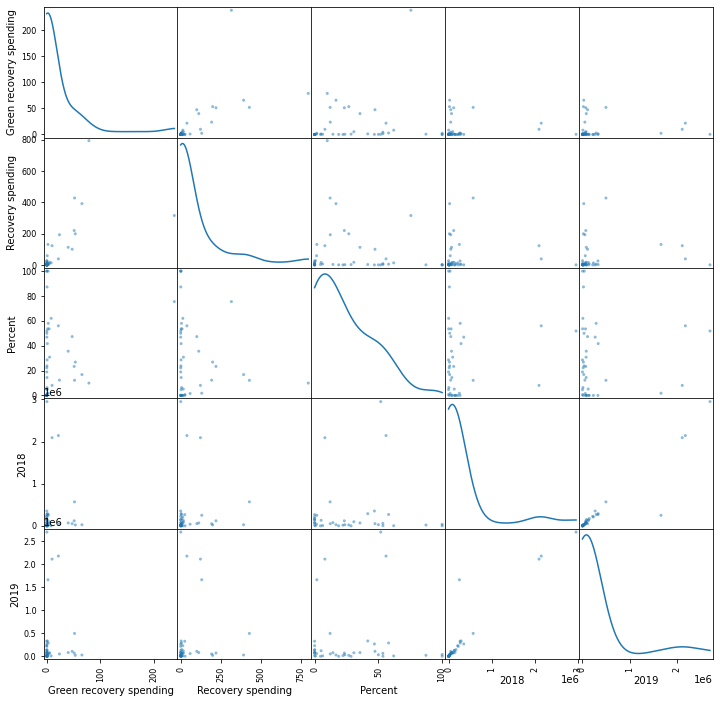

In [29]:
scatter_matrix(GROmerge, alpha=0.5, diagonal='kde', figsize=(12,12))

In [30]:
corr = GROmerge.corr(method='pearson')
corr

,Green recovery spending,Recovery spending,Percent,2018,2019
Green recovery spending,1.000000,0.651449,0.172324,0.021887,0.001243
Recovery spending,0.651449,1.000000,-0.121912,0.050272,0.086783
Percent,0.172324,-0.121912,1.000000,0.095359,0.038757
2018,0.021887,0.050272,0.095359,1.000000,0.936400
2019,0.001243,0.086783,0.038757,0.936400,1.000000


<AxesSubplot:>

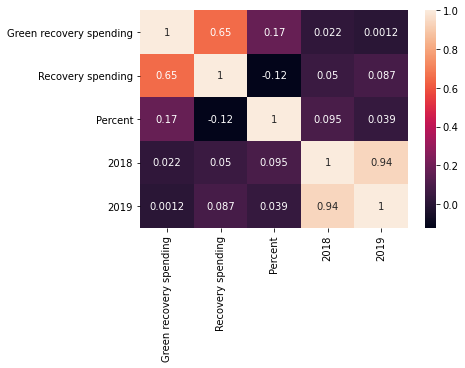

In [31]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
